<a href="https://colab.research.google.com/github/Senedaa/Cloud-Computing/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Predict  Customer Behavior

Binary Classification problem

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

### import data

The dataset that we have in this case is from an online platform about the historical transactions of customers. It contains the data points such as age, total pages viewed, and whether the customer is a new or repeat customer. The output variable contains whether the customer bought the product online or not.

In [2]:
#read the data
df = pd.read_csv('online_sales.csv')

In [3]:
df.shape

(316200, 4)

In [4]:
df.head()

,age,new_user,total_pages_visited,converted
0,25,1,1,0
1,23,1,5,0
2,28,1,4,0
3,39,1,5,0
4,30,1,6,0


In [5]:
#target class frequency
df.converted.value_counts()

converted
0    306000
1     10200
Name: count, dtype: int64

We can clearly see there is a skewed target class in this dataset that typically needs to be treated by some undersampling/oversampling technique

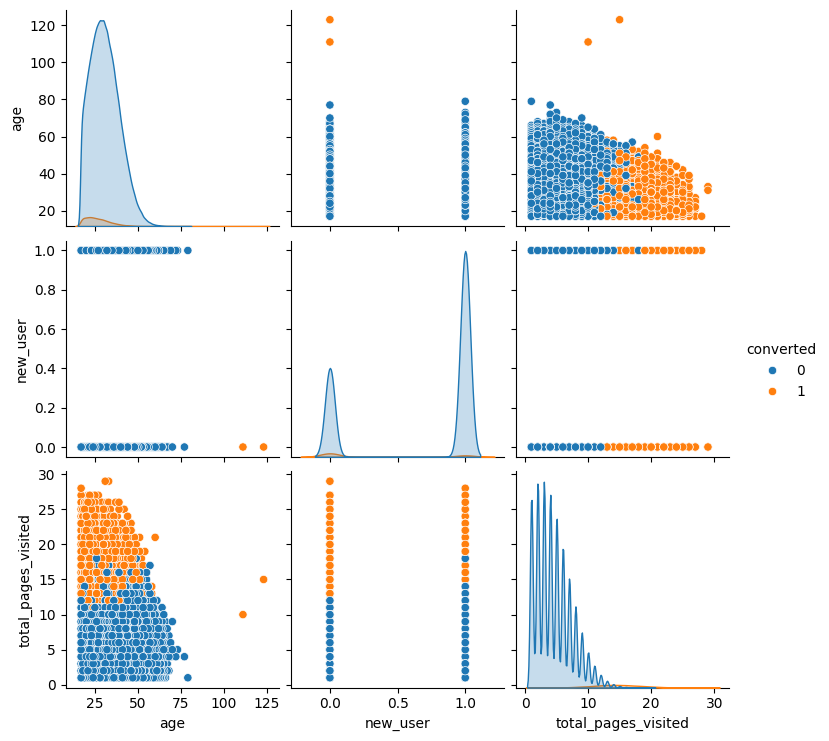

In [9]:
sns.pairplot(df, hue='converted')
plt.show()
# Data Visualization
# Pair Plots

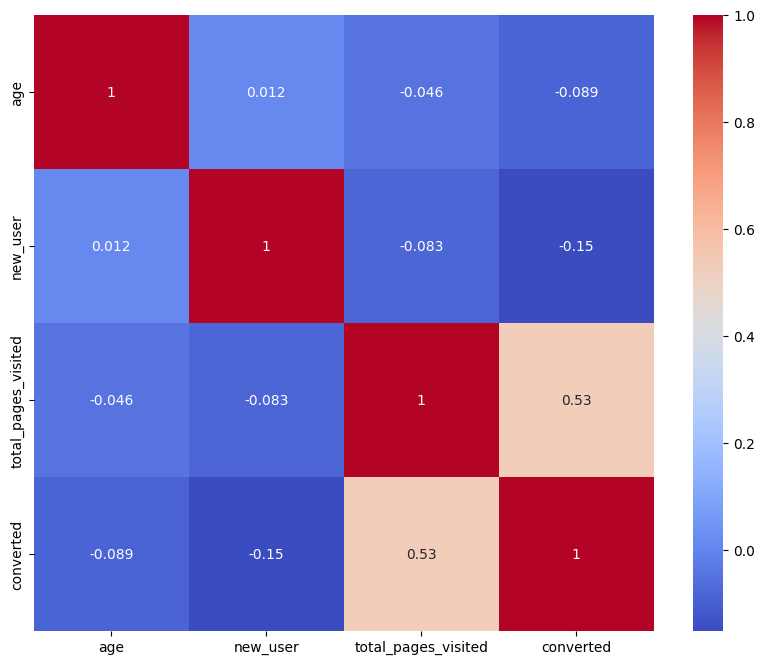

In [10]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   age                  316200 non-null  int64
 1   new_user             316200 non-null  int64
 2   total_pages_visited  316200 non-null  int64
 3   converted            316200 non-null  int64
dtypes: int64(4)
memory usage: 9.6 MB


In [31]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


### Preparing Data For Modeling

In [32]:
input_columns = [column for column in df.columns if column != 'converted']
output_column = 'converted'
print (input_columns)
print (output_column)

['age', 'new_user', 'total_pages_visited']
converted


In [33]:
#input data
X = df.loc[:,input_columns].values
#output data
y = df.loc[:,output_column]
#shape of input and output dataset
print (X.shape, y.shape)

(316200, 3) (316200,)


**In ideal ML scenarios, proper data exploration and feature engineering are advised before model training, Since the overall idea is to deploy the ML app, the focus is on the containerizing the app instead of improving the accuracy of the model**

### Modeling : Logistic Regression

we are going to train a simple logistic regression model to make the predictions on the test data and later export it for deployment purposes

In [34]:
#import model specific libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [35]:
#Split the data into training and test data (70/30 ratio)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=555, stratify=y)

In [36]:
#validate the shape of train and test dataset
print (X_train.shape)
print (y_train.shape)

print (X_test.shape)
print (y_test.shape)

(221340, 3)
(221340,)
(94860, 3)
(94860,)


In [37]:
#check on number of positive classes in train and test data set
print(np.sum(y_train))
print(np.sum(y_test))

7140
3060


## Train the Logistic Model

In [38]:
#fit the logisitc regression model on training dataset
logreg = LogisticRegression(class_weight='balanced').fit(X_train,y_train)

In [39]:
logreg.score(X_train, y_train)

0.9370470768952742

In [40]:
#validate the model performance on unseen data
logreg.score(X_test, y_test)

0.9369175627240144

In [41]:
#make predictions on unseen data
predictions=logreg.predict(X_test)

## Results

In [42]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,target_names=["Non Converted", "Converted"]))

               precision    recall  f1-score   support

Non Converted       1.00      0.94      0.97     91800
    Converted       0.33      0.92      0.49      3060

     accuracy                           0.94     94860
    macro avg       0.66      0.93      0.73     94860
 weighted avg       0.98      0.94      0.95     94860



In [43]:
logreg

LogisticRegression(class_weight='balanced')

## Export Model

In [44]:
### Create a Pickle file using serialization
import pickle

pickle_out = open("logreg.pkl","wb")
pickle.dump(logreg, pickle_out)
pickle_out.close()

In [45]:
pickle_in = open("logreg.pkl","rb")
model = pickle.load(pickle_in)

In [46]:
model

LogisticRegression(class_weight='balanced')

In [47]:
#predict using the model on customer input
model.predict([[32,1,1]])[0]


0

In [49]:
#Group prediction (multiple customers)
df_test = pd.read_csv('test_data.csv')
predictions = model.predict(df_test)

print(list(predictions))

[0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


As we can observe, the model seems to be making predictions for a single customer as well as a group of customers.

Now we can move on to the next step of building a Flask app to run this model.